# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, HTML

df = pd.read_csv('data/human_body_temperature.csv')

# Set default Seaborn style
sns.set()

# Global variable
temperature = df['temperature']

In [2]:
# Observe dataset
display(df.head())
df.info()
display(df.describe())

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## 1. Is the distribution of body temperatures normal?

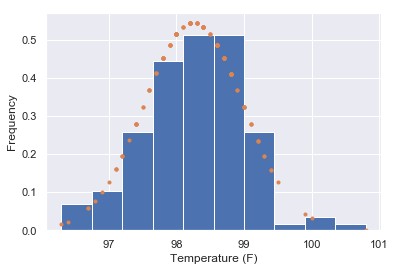

In [3]:
# Get mean of temperature
temperature_mean = temperature.mean()
# Get the standard deviation of temperature
temperature_std = temperature.std()

# Plot histogram
_ = temperature.plot.hist(density=1)
_ = plt.xlabel('Temperature (F)')
# Plot normal pdf with same mean and standard deviation
_ = plt.plot(temperature, stats.norm.pdf(temperature,temperature_mean, temperature_std), marker='.', linestyle='none')
plt.show()

The histogram is roughly aligned with the normal distributed data, which was generated with the same mean and standard deviation. The distribution of body temperature seems normal. To further verify, we use ECDF and CDF.

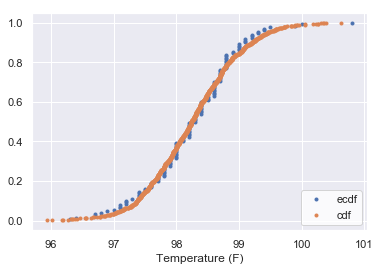

In [4]:
# Create ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)
    
    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

# Get ECDF
x, y = ecdf(df['temperature'])

# Get CDF
temperature_theor = np.random.normal(temperature_mean, temperature_std, size=1000)
x_theor, y_theor = ecdf(temperature_theor)

# Plot ECDF and CDF
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none')
_ = plt.legend(('ecdf','cdf'),loc='lower right', facecolor='white')
_ = plt.xlabel('Temperature (F)')
plt.show()

The ECDF and CDF in the graph are aligning, which imply the distribution of the temperature is normal.

## 2. Is the sample size large? Are the observations independent?

According to the rule of CLT, the sample size larger than 30 is sufficiently large. Thus, sample size of 130 is large. Since each body is independent, the observations are independent.

## 3. Is the true population mean really 98.6 degrees F?

First, try a bootstrap hypothesis test. The hypothesis is set up as following,<br>
<br>
$H_{0}$: The true mean of temperature is 98.6 $^\circ$F.<br>
$H_{A}$: The true mean of temperature is not 98.6 $^\circ$F.<br>

In [5]:
# Initialize array of replicates with size of 10,000
bs_replicates = np.empty(10000)
# Generate replicates
for i in range(10000):
    bs_sample = np.random.choice(temperature, size=len(temperature))
    bs_replicates[i] = np.mean(bs_sample)
# Compute the p-value
p = np.sum(bs_replicates >= 98.6)/len(bs_replicates)
# Print the p-value
print('p =', p)

p = 0.0


The p-value is very low, which suggest the $H_{0}$ is false. The true mean of body temperature is not 98.6 $^\circ$F. 

Next, we will try frequentist statistical testing. Since body temperature is a set of data, we will use a one-sample test. The data set has a size of 130, which is greater than 30, thus it's more appropriate to use z statistic in this situation. As we know the equation for z score is,

$$z = \frac{(\bar{x}- \mu_{\bar{x}})}{\sigma_{\bar{x}}}$$

We don't know the value of $\sigma_{\bar{x}}$, but we can calculate it with $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$

In [7]:
# Calculate the sample standard deviation
sigma = temperature_std/np.sqrt(len(temperature))
# Calculate the z score
z = (temperature_mean - 98.6)/sigma
# Print the z score
print('z =', z)
# Calculate the p-value
p = stats.norm.sf(abs(z))*2
# Print the p-value
print('p =', p)

z = -5.4548232923645195
p = 4.9021570141012155e-08


The p-value is very small, which indicate the $H_0$ is false. We will also try t statistic and compare the results.

In [8]:
# The t score and z score should be about the same
t = z
# Print the t score
print('t =', t)
# Calculate the p-value
p = stats.t.sf(abs(t), len(temperature)-1)*2
# Print the p-value
print('p =', p)

t = -5.4548232923645195
p = 2.4106320415561276e-07


The p-value from t statistic is different from the p-value from z statistic. However, both indicate the true mean of body temperature is not 98.6 $^\circ$F

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [9]:
# Draw a small sample of size 10
small_sample = np.random.choice(temperature, size=10)

# Get the sample mean
sm_mean = np.mean(small_sample)

# Get the sample standard deviation
sm_std = np.std(small_sample)

# Perform t statistic test
sigma = sm_std/np.sqrt(len(small_sample))
t = (sm_mean - 98.6)/sigma
# Print the t score
print('t =', t)
# Calculate the p-value
p_t = stats.t.sf(abs(t), len(small_sample)-1)*2
# Print the p-value
print('p =', p_t)

# Perform z statistic test
z = t
# Print the z score
print('z =', z)
# Calculate the p-value
p_z = stats.norm.sf(abs(z))*2
# Print the p-value
print('p =', p_z)

t = -0.18136906252733798
p = 0.8600967639268566
z = -0.18136906252733798
p = 0.8560779006665249


In the situation of sample size less than 30, t statistic test should be used. From the result, we can see two p-values are significantly different. This shows the importance of using the right statistic test.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

We will start by computing the margin of error and confidence level. First, using the bootstrap approach. We will use the bootstrap replicates from previous.

In [10]:
# Calculate the confidence interval with 95% confidence
conf_int = np.percentile(bs_replicates,[2.5,97.5])
# Print the confidence level
print('The 95% confidence level =', conf_int)

The 95% confidence level = [98.12307692 98.37769231]


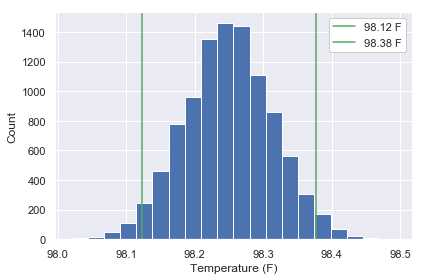

In [11]:
# Plot graph to show 95% confidence interval
_ = plt.hist(bs_replicates, bins=20)
_ = plt.axvline(conf_int[0], color='g')
_ = plt.axvline(conf_int[1], color='g')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Count')
_ = plt.legend(('98.12 F','98.38 F'),loc='upper right', facecolor='white', framealpha=1)
plt.tight_layout()
plt.show()

The 95% confidence interval falls between 98.12 $^\circ$F and 98.38 $^\circ$F. Temperatures that are considered "abnormal" are the ones outside of this interval. 

Next, we will try the frequentist approach.

In [12]:
# Perform z statistic
# Compute Margin of Error for 95% CI
z = 1.96
# Compute the 95% CI
moe = 1.96*temperature_std
lower = temperature_mean - moe
upper = temperature_mean + moe
print('The 95% CI is between ', lower, 'and', upper)

The 95% CI is between  96.81219177947442 and 99.68626975898708


From the z statistic, we get the 95% confidence interval is between 96.81 $^\circ$F and 99.69 $^\circ$F. The "abnormal" temperature would be outside of this interval.

## 6. Is there a significant difference between males and females in normal temperature?

First, we explore and observe the temperature data of female and male.

The mean of body temperature of male is  98.10461538461537
The mean of body temperature of female is  98.39384615384614
The difference of mean is  0.2892307692307696


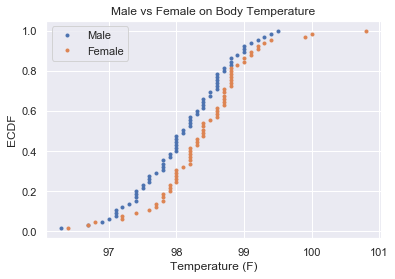

In [13]:
# Get temperature data of male and female
temperature_m = df.loc[df['gender'] == 'M']['temperature']
temperature_f = df.loc[df['gender'] == 'F']['temperature']

# Calculate the mean of male and female
print('The mean of body temperature of male is ', np.mean(temperature_m))
print('The mean of body temperature of female is ', np.mean(temperature_f))
diff_of_means = np.abs(np.mean(temperature_m) - np.mean(temperature_f))
print('The difference of mean is ', diff_of_means)
# Plot ECDF graph
m_x, m_y = ecdf(temperature_m)
f_x, f_y = ecdf(temperature_f)

_ = plt.plot(m_x, m_y, marker='.', linestyle='none')
_ = plt.plot(f_x, f_y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(['Male', 'Female'])
_ = plt.title('Male vs Female on Body Temperature')
plt.show()

The diffence between body temperature of males and females is small from the means and the graph. Since we are checking if male and female have identical temperature distribution, we will use permutation test if the difference is by chance. The hypothesis is constructed as the following,

$H_0$: The distribution of temperature is the same between males and females.<br>
$H_A$: The distribution of temperature is different between males and females.

In [14]:
# Initialize an array for permutaion replicates
perm_replicates = np.empty(10000)

for i in range(10000):
    # Generate permutation sample
    # Concatenate the datasets
    data = np.concatenate((temperature_m,temperature_f))
    # Permute the concatenated array
    permuted_data = np.random.permutation(data)
    # Split the array into two parts
    perm_m = permuted_data[:len(temperature_m)]
    perm_f = permuted_data[len(temperature_m):]
    # Compute the test statistics
    perm_replicates[i] = np.abs(np.mean(perm_m) - np.mean(perm_f))
    
# Calcualte the p-value
p = np.sum(perm_replicates >= diff_of_means)/len(perm_replicates)
print('p =', p)

p = 0.0231


The p-value is small enough to reject the null hypothesis. We can conclude that there's statistically significant difference between males and females in normal temperature.